### Simple Linear Regression 
- <b> by Abhishek </b>

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats
import statistics as sts
import statsmodels.api as sts_model
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("task1.xlsx")

In [3]:
df.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [4]:
df.shape

(25, 2)

In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [7]:
#sts.mode(df) #No unique mode ; found 2 equally common values

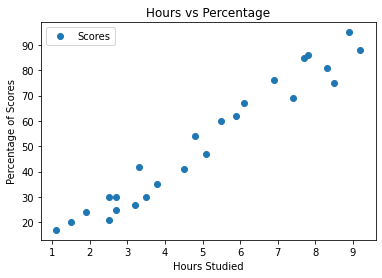

In [8]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage of Scores')  
plt.show()

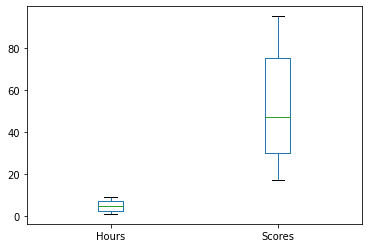

In [9]:
df.plot(kind='box')

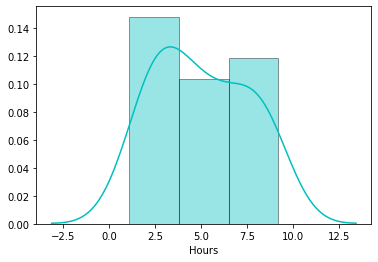

In [10]:
sns.distplot(df['Hours'], hist=True, kde=True, color = 'c',
             hist_kws={'edgecolor':'black'})

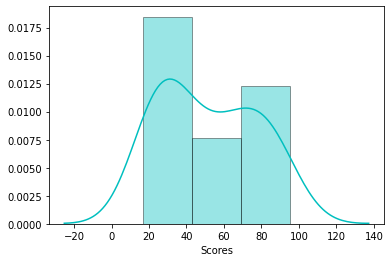

In [11]:
sns.distplot(df['Scores'], hist=True, kde=True, color = 'c',
             hist_kws={'edgecolor':'black'})

In [12]:
print( '\nSkewness for data : ', skew(df)) 
print( '\nKurtosis for normal distribution :',  
      kurtosis(df, fisher = False)) # Fisher’s definition is used (normal 0.0) if True; else Pearson’s definition is used (normal 3.0) if set to False.
print( '\nKurtosis for normal distribution :',  
      kurtosis(df, fisher = True))


Skewness for data :  [0.17872206 0.21968605]

Kurtosis for normal distribution : [1.71316436 1.5984306 ]

Kurtosis for normal distribution : [-1.28683564 -1.4015694 ]


In [13]:
stat,p = stats.shapiro(df)
print('stat=%.3f , p=%.3f' % (stat,p))
if p>0.05:
    print("probably gaussian")
else:
    print("its not")

stat=0.818 , p=0.000
its not


#### model_building

In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:,1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 2.0181600414346974
slope: [9.91065648]


<blockquote>The value 𝑏₀ = 2.018 (approximately) illustrates that model predicts the response 2.018 when 𝑥 is zero. <br>The value 𝑏₁ = 9.910 means that the predicted response rises by 9.910 when 𝑥 is increased by one.</blockquote>

#### prediction

In [24]:
y_predictions = model.predict(X_test)
#y_predictions_two = model.intercept_ + model.coef_ * X_test

In [19]:
X_test #Untrained new data

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [20]:
y_test #actual label

array([20, 27, 69, 30, 62], dtype=int64)

In [21]:
y_predictions #predicted labels

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [26]:
y_predictions_two

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [27]:
# Comparing Actual vs Predicted
pd.DataFrame({'Actual': y_test, 'Predicted': y_predictions})   

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### prediction on new data

In [28]:
x_new_own = np.arange(5).reshape((-1, 1))
x_new_own

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [29]:
y_new_own = model.predict(x_new_own)
y_new_own

array([ 2.01816004, 11.92881652, 21.839473  , 31.75012948, 41.66078596])

#### Evaluating the model performance

In [30]:
from sklearn import metrics
print("mean absolute error:", metrics.mean_absolute_error(y_test,y_predictions))

mean absolute error: 4.183859899002975


In [31]:
accuracy = model.score(X_test,y_test)
accuracy

0.9454906892105355